## Optimal Airplane control using RSLQR Servomechanism

In [117]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import linalg
import control

### Design an RSLQR to track a constant airspeed command and a constant anlge -of-attack command
##### The LTI state-space model for the longitudinal linearized dynamics is given as,
![alt text](longitudinal_model.png)

In [118]:
A = np.array([[-0.038,18.984,0,-32.174],[-0.001,-0.632,1.0,0],[0,-0.759,-0.518,0],[0,0,1,0]])
B = np.array([[0,10.1],[-0.0086,0],[-0.011,0.025],[0,0]])

![alt text](abc_aug.png)

In [119]:
A_aug = np.array([[0,0,1,0,0,0], [0,0,0,1,0,0],[0,0,-0.038,18.984,0,-32.174],[0,0,-0.001,-0.632,1.0,0],[0,0,0,-0.759,-0.518,0],[0,0,0,0,1,0]])
B_aug = np.array([[0,0],[0,0],[0,10.1],[-0.0086,0],[-0.011,0.025],[0,0]])
C = np.array([[0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0]])

##### The diagoanl elements of Q were slected based on trial and error method as in 'Simulation and Analysis of Integral LQR Controller for Inner Control Loop Design of a Fixed Wing Micro Aerial Vehicle (MAV)'

In [120]:
Q = np.identity(6)
Q[0,0] = 0.01
Q[1,1] = 0.005
Q[3,3] = 0.001
Q[4,4] = 0.0005
Q[5,5] = 0.0001
R = 0.01 * np.identity(2)

![alt text](gain.png)

In [121]:
P = linalg.solve_continuous_are(A_aug,B_aug,Q,R)
K = linalg.inv(R) @ (B_aug.T @ P)
r = np.array([[30, 0.05],]).T # Reference speed and angle-of-attack

![alt text](closed_loop_system.png)

reference speed =  [30.]
reference angle_of_attack =  [0.05]


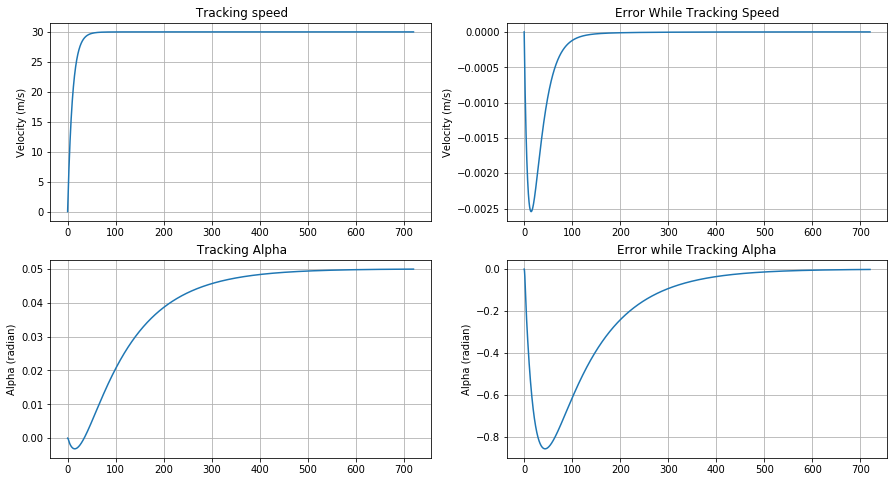

In [122]:
sys_resp_1 = control.StateSpace(A_aug-B_aug@K,np.concatenate((-np.identity(2),np.zeros((4,2)))),C,0)
[Tout, yout] = control.step_response(sys_resp_1)

print('reference speed = ',r[0])
print('reference angle_of_attack = ',r[1])
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(Tout,r[0]*np.squeeze(yout[0,0,:])) #Scaling the step response with r[0]
plt.ylabel('Velocity (m/s)')
plt.title(' Tracking speed')
plt.grid()

plt.subplot(2,2,2)
plt.plot(Tout,r[1]*np.squeeze(yout[0,1,:])) #Scaling the step response with r[1]
plt.ylabel('Velocity (m/s)')
plt.title('Error While Tracking Speed')
plt.grid()

plt.subplot(2,2,3)
plt.plot(Tout,r[1]*np.squeeze(yout[1,1,:]))
plt.ylabel('Alpha (radian)')
plt.title(' Tracking Alpha')
plt.grid()

plt.subplot(2,2,4)
plt.plot(Tout,r[0]*np.squeeze(yout[1,0,:]))
plt.ylabel('Alpha (radian)')
plt.title('Error while Tracking Alpha')
plt.grid()
plt.show()

##### The reference speed was chosen as 30 ft/s, and the angle-of-attack was 0.01.With the proper selection of Q and R, we can see that the tracking is working pretty well. It can quickly follow the reference command. 

## Design an RSLQR to track a constant Roll Angle

##### The Lateral Linearized dynamic system is given as:
![alt text](Lateral_model.png)

In [123]:
A_aug = np.array([[0,0,0,0,1],[0,-0.0829,0,-1,0.0487],[0,-4.546,-1.699,0.1717,0],[0,3.382,-0.0654,-0.0893,0],[0,0,1,0,0]])

B_aug = np.array([[0,0],[0,0.0116],[27.276,0.5758],[0.3952,-1.362],[0,0]])
B_cls_loop = np.zeros((5,2))
B_cls_loop[0,0] = -1
C = np.array([0, 0, 0, 0, 1])

Q = np.identity(5)
Q[0,0] = 0.01
# Q[1,1] = 0.005
# Q[3,3] = 0.001
# Q[4,4] = 0.0005
R = 0.01 * np.identity(2)

reference roll angle =  0.05


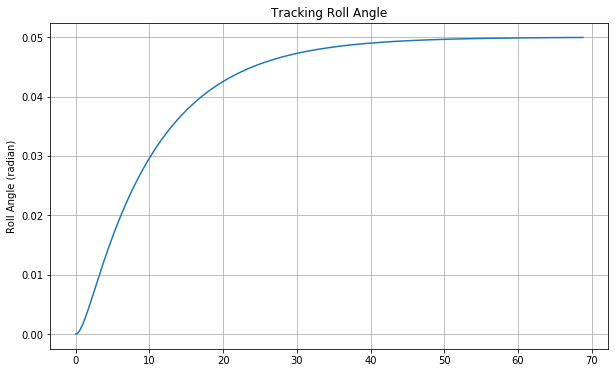

In [124]:
P = linalg.solve_continuous_are(A_aug,B_aug,Q,R)
K = linalg.inv(R) @ (B_aug.T @ P)
r = 0.05 # desired roll angle
H1 = control.StateSpace(A_aug-B_aug@K,B_cls_loop,C,0)
[Tout, yout] = control.step_response(H1)

print('reference roll angle = ',r)
plt.figure(figsize=(10,6))

plt.plot(Tout,r*np.squeeze(yout[0,0,:]))
plt.ylabel('Roll Angle (radian)')
plt.title('Tracking Roll Angle')
plt.grid()
plt.show()

### The roll angle is perfectly tracked in lateral dynamic system.